# Lab 6 (Part 2)

## Principal Component Analysis Implementation from scratch

## 10th March 2021

importing

In [1]:
import numpy as np

# PCA Class

In [12]:
class PCA:
    def __init__(self,n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        
    def fit(self,X):
        #calculate the mean of 'X'
        self.mean = np.mean(X,axis=0)
        
        #centering of mean
        X = X-self.mean
        
        #calculate covariance of given X function needs sample from data
        cov = np.cov(X.T)
        
        #calculate the eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        
        #sort eigenvectors in descending order
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1] #arg sort returns the index of the sorted values instead of the values
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        
        #store first n eigenvectors in self.components
        self.components = eigenvectors[0:self.n_components]
        
    def transform(self,X):
        X = X-self.mean
        return np.dot(X,self.components.T)
        

# Testing PCA Class -> 1

With Breast Cancer Dataset

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [28]:
data = datasets.load_breast_cancer()

In [29]:
X = data.data
y = data.target

In [30]:
pca  = PCA(15)

In [31]:
pca.fit(X)

In [32]:
X_projected = pca.transform(X)

In [33]:
print("Shape of X:", X.shape)
print("Shape of Transformed X: ", X_projected.shape)

Shape of X: (569, 30)
Shape of Transformed X:  (569, 15)


In [34]:
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

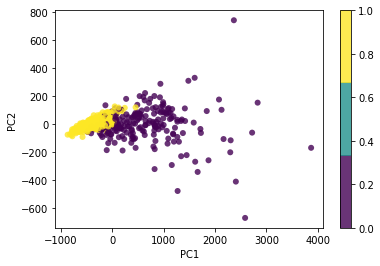

In [35]:
plt.scatter(x1, x2, c=y, edgecolor='none', alpha=0.8,
    cmap=plt.cm.get_cmap('viridis', 3))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()

# Testing PCA Class -> 2

With Iris Dataset

In [3]:
data = datasets.load_iris()

In [10]:
X = data.data
y = data.target

In [13]:
pca = PCA(2)

In [14]:
pca.fit(X)

In [15]:
X_projected = pca.transform(X)

In [16]:
print("Shape of X:", X.shape)
print("Shape of Transformed X: ", X_projected.shape)

Shape of X: (150, 4)
Shape of Transformed X:  (150, 2)


In [17]:
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

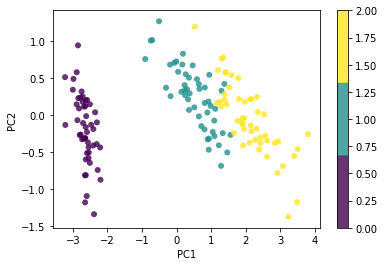

In [43]:
plt.scatter(x1, x2, c=y, edgecolor='none', alpha=0.8,
    cmap=plt.cm.get_cmap('viridis', 3))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()

In [8]:
from sklearn.cluster import KMeans

In [18]:
kmeans = KMeans(n_clusters= 10)

In [21]:
label = kmeans.predict(data)

NotFittedError: This KMeans instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.